# Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn as sl
from sklearn import preprocessing
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

## Mengimport dataset yang sudah di download sebelumnya.

In [2]:
#load data dari file CSV
df=pd.read_csv('irisnama.csv')

## Menampilkan Dataset Iris

In [3]:
df.head(7)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa


### Menampilakan baris dan kolom dataset

In [4]:
df.shape

(150, 5)

### Menampilkan informasi dari dataset iris yang sudah dimasukkan

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Dari informasi dataset diatas terdapat 5 kolom, yakni SepalLengthCM, SepalWidthCm, PetalLengthCm, PetalWidthCm, dan Species. jenis data float dan integer, setiap kolom memiliki 150 data dan tidak ada data yang kosong (null).

### Melihat deskripsi statistik kumpulan data

In [6]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Memeriksa nilai nol

In [7]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Disini menampilkan semua nilai adalah 0. Ini berarti menunjukkan tidak ada nilai nol diseluruh kerangka data

### melihat nama kolom 

In [8]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### merubah Pandas data frame menjadi numpy menggunakan scikit-learn library

In [9]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] .values  #.astype(float)
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

# Normalisasi Dataset Iris

In [10]:
#Melakukan normalisasi data
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:20]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673],
       [-0.53717756,  1.95766909, -1.17067529, -1.05003079],
       [-1.50652052,  0.80065426, -1.3412724 , -1.18150376],
       [-1.02184904,  0.80065426, -1.2844067 , -1.31297673],
       [-1.74885626, -0.35636057, -1.3412724 , -1.31297673],
       [-1.14301691,  0.10644536, -1.2844067 , -1.4444497 ],
       [-0.53717756,  1.49486315, -1.2844067 , -1.31297673],
       [-1.26418478,  0.80065426, -1.227541  , -1.31297673],
       [-1.26418478, -0.1249576 , -1.3412724 , -1.4444497 ],
       [-1.87002413, -0.1249576 , -1.51186952, -1.4444497 ],
       [-0.05250608,  2.18907205, -1.45500381, -1.31297673],
       [-0.17367395,  3.11468391, -1.2844067 , -1.05003079],
       [-0.53717756,  1.

In [11]:
y = df['Species'].values
y[0:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [12]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

# Visualisasi Data

In [13]:
#Visualisasi, dan analisis serta melihat plot hitungan fitur spesies menggunakan seaborn
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### Menampilkan data dengan histogram

array([[<AxesSubplot: title={'center': 'SepalLengthCm'}>]], dtype=object)

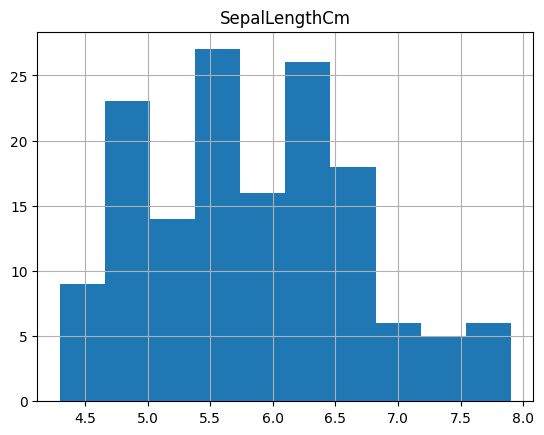

In [14]:
df.hist(column='SepalLengthCm', bins=10)

array([[<AxesSubplot: title={'center': 'SepalWidthCm'}>]], dtype=object)

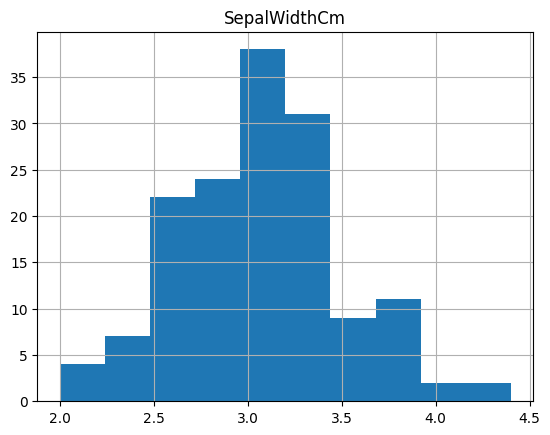

In [15]:
df.hist(column='SepalWidthCm', bins=10)

array([[<AxesSubplot: title={'center': 'PetalLengthCm'}>]], dtype=object)

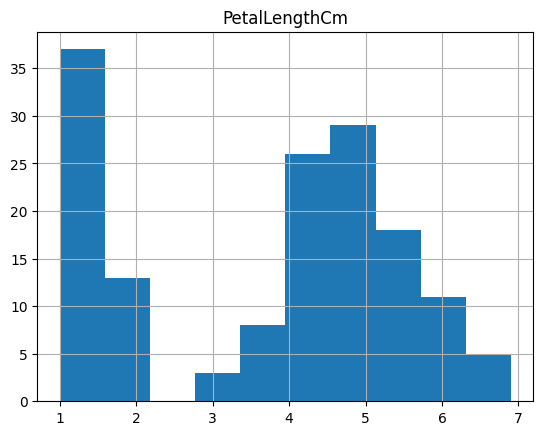

In [16]:
df.hist(column='PetalLengthCm', bins=10)

array([[<AxesSubplot: title={'center': 'PetalWidthCm'}>]], dtype=object)

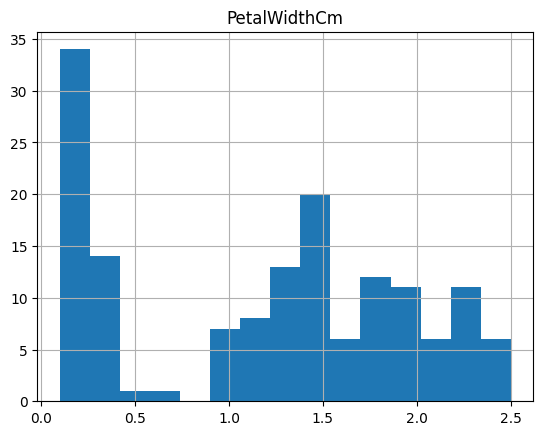

In [17]:
df.hist(column='PetalWidthCm', bins=15)

### Menampilkan data dengan menggunakan Scatter Plot

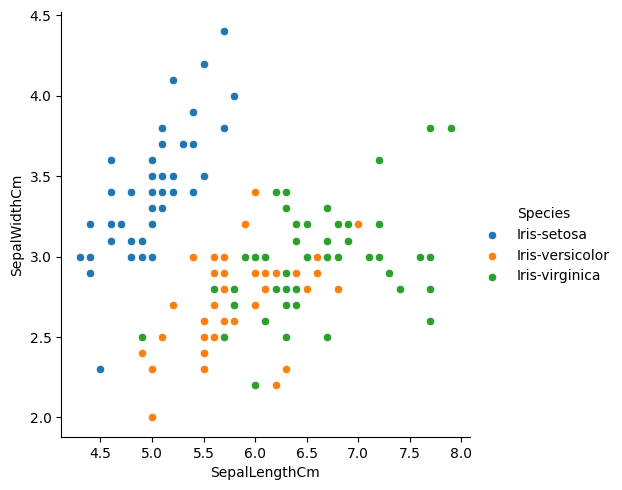

In [18]:
g = sns.FacetGrid(df,height=5,hue="Species")
g.map(sns.scatterplot,"SepalLengthCm","SepalWidthCm")
g.add_legend()

Dari hasil plot data label (Species) dari fitur SepalLengthCm dan SepalWidthCm,  yaitu didapatkan informasi:

- Iris Sentosa secara umum terpisah secara linier (linear separated) dengan Iris Versicolor dan Iris Virginica.
- Iris Versicolor dan Iris Virginica mengalami ovelap sehingga sulit dipisahkan secara linier sehingga lebih sulit dipisahkan dibandingkan dengan Iris Sentosa.
- Dari dua fitur diatas sudah cukup baik memisahkan label Iris Sentosa tapi belum cukup baik untuk dua label lainnya (Iris Versicolor dan Iris Virginica).

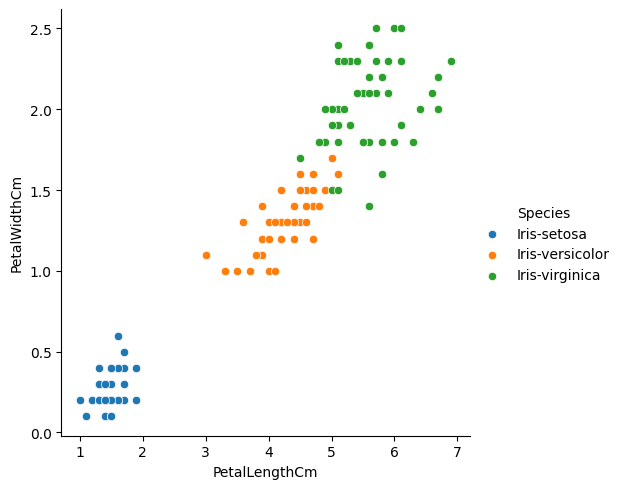

In [19]:
g = sns.FacetGrid(df,height=5,hue="Species")
g.map(sns.scatterplot,"PetalLengthCm","PetalWidthCm")
g.add_legend()

Dari hasil plot data label (Species) dari fitur PetalLengthCm dan PetalWidthCm. didapatkan informasi yaitu :

- Iris Sentosa secara umum terpisah secara linier (linear separated) dengan Iris Versicolor dan Iris Virginica.
- Iris Versicolor dan Iris Virginica mengalami sedikit ovelap sehingga sulit dipisahkan secara linier sehingga lebih sulit dipisahkan dibandingkan dengan Iris Sentosa.
- Dari dua fitur diatas sudah cukup baik memisahkan label Iris Sentosa tapi belum cukup baik untuk dua label lainnya (Iris Versicolor dan Iris Virginica).
- Overlap yang terjadi pada plot dari petal_length dan petal_width cenderung lebih sedikit dibandingkan dengan overlap yang terjadi pada plot dari sepal_length dan sepal_width.

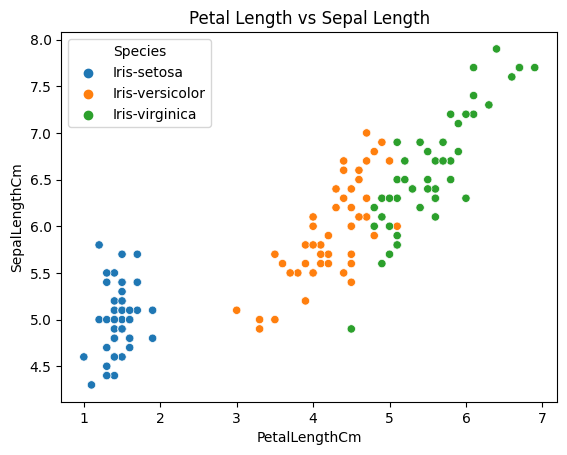

In [20]:
sns.scatterplot(x = 'PetalLengthCm', y = 'SepalLengthCm', data = df ,hue ='Species')
plt.title('Petal Length vs Sepal Length')
plt.show()

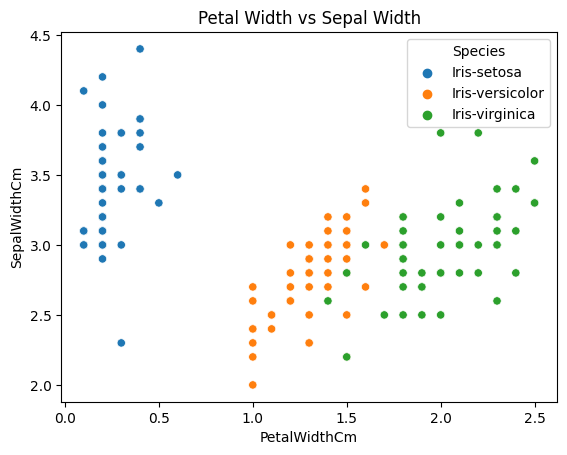

In [21]:
sns.scatterplot(x = 'PetalWidthCm', y = 'SepalWidthCm', data = df ,hue ='Species')
plt.title('Petal Width vs Sepal Width')
plt.show()

### menggunakan box plot

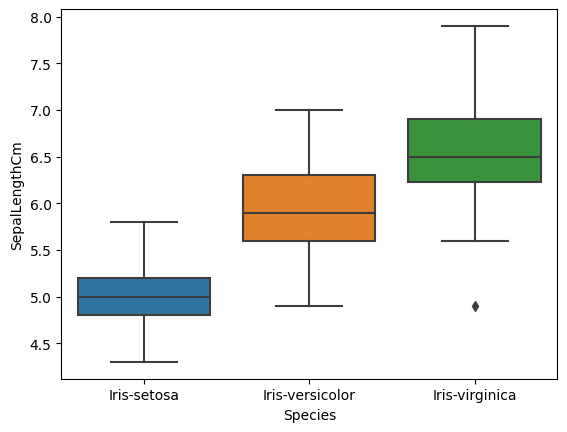

In [22]:
sns.boxplot(x="Species",y="SepalLengthCm", data=df)
plt.show()

### memisahkan data traning dan testing

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.7, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (45, 4) (45,)
Test set: (105, 4) (105,)


# Penerapan Menggunakan KNN

In [24]:
#Fase Training 
k = 5
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier()

In [25]:
#fase testing
yhat = neigh.predict(X_test)
yhat[0:50]

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Menghitung akurasi dan prediksi

In [26]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  1.0
Test set Accuracy:  0.9333333333333333


In [27]:
for i in range (2,10):
  k = i
  #Train Model and Predict  
  neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
  yhat = neigh.predict(X_test)

  print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train))) 
  print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9777777777777777
Test set Accuracy:  0.9809523809523809
Train set Accuracy:  0.9555555555555556
Test set Accuracy:  0.9333333333333333
Train set Accuracy:  0.9777777777777777
Test set Accuracy:  0.9714285714285714
Train set Accuracy:  1.0
Test set Accuracy:  0.9333333333333333
Train set Accuracy:  1.0
Test set Accuracy:  0.9428571428571428
Train set Accuracy:  0.9555555555555556
Test set Accuracy:  0.9142857142857143
Train set Accuracy:  0.9777777777777777
Test set Accuracy:  0.9238095238095239
Train set Accuracy:  0.9111111111111111
Test set Accuracy:  0.8857142857142857


In [28]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
#input data train pada fungsi klasifikasi
classifier.fit(X_train,y_train)

KNeighborsClassifier()

# Visualisasi Hasil

<Figure size 640x480 with 0 Axes>

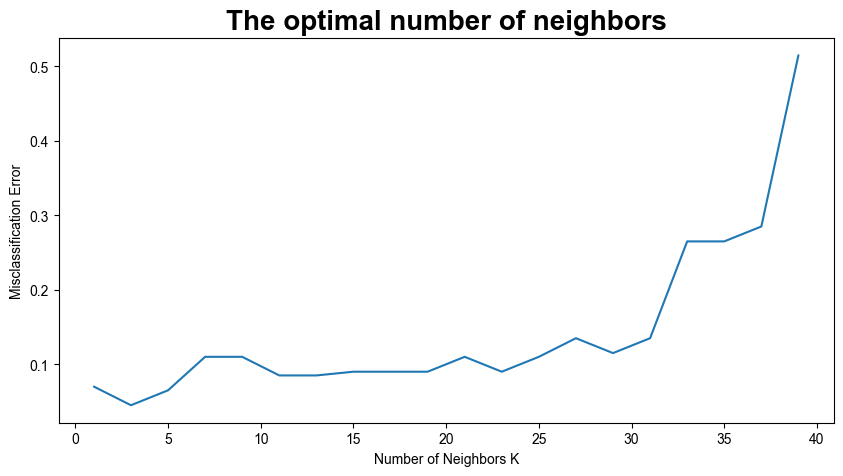

In [29]:
from sklearn.model_selection import cross_val_score
#membuat list of K for KNN
k_list = list(range(1,50,2))
cv_scores = []
# melakukan 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10)
    cv_scores.append(scores.mean())
# changing to misclassification error
MSE = [1 - x for x in cv_scores]
plt.figure()
plt.figure(figsize=(10,5))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=10)
plt.ylabel('Misclassification Error', fontsize=10)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)
plt.show()

# Penerapan Logistic Regression

In [30]:
x=df.iloc[:,:4]
y=df.iloc[:,4]

menentukan fitur variabel independen dan dependen

In [31]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# Training dan Testing

### Memisahkan data menjadi kumpulan data Training dan Testing

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [33]:
x_train.shape

(112, 4)

In [34]:
x_test.shape

(38, 4)

In [35]:
y_train.shape

(112,)

In [36]:
y_test.shape

(38,)

In [37]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [38]:
model.fit(x_train,y_train)

LogisticRegression()

In [39]:
y_pred=model.predict(x_test)

In [40]:
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

# Akurasi dan Visualisasi Hasil

In [41]:
accuracy=accuracy_score(y_test,y_pred)*100
print("Accuracy of the model is {:.2f}".format(accuracy))

Accuracy of the model is 97.37


Dan disini kami mendapatkan akurasi model sebesar 97,37 yang artinya bahwa model yang kami bangun sangat akurat

In [42]:
confusion_matrix(y_test,y_pred)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

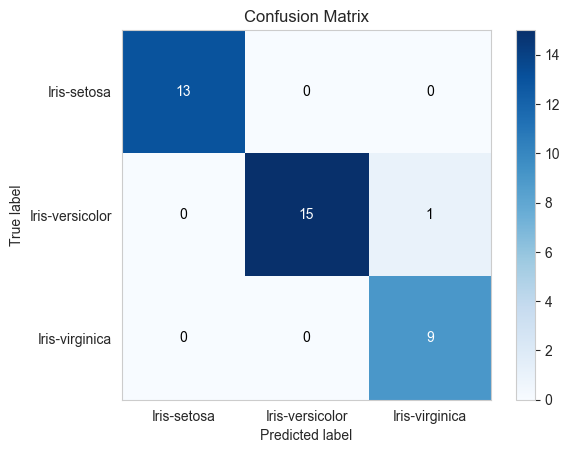

In [43]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False)
plt.show()